# <center>$\color{blue}{\text{Clustering DNA.}}$</center>  
## <center>Saúl Juárez Ordóñez / Benjamín González López</center>  
### <center>Tecnológico de Monterrey / Centro de Investigación y de Estudios Avanzados</center>

![alt text](DNA.png "Clustering DNA")

### <div style="text-align: justify"> $\color{blue}{\text{Introduction.}}$ The genetic information of a living cell is encoded in the DNA molecule. It is a double helix containing four nitrogenous bases: adenine (a), guanine (g), cytosine (c) and thymine (t). It was discovered in 1961, by means of genetic experiments, that the genetic code is given in groups of non overlapping triplets [1]. In this activity we reproduce the experiment using only a randomly chosen fragment of the genomic sequence of a bacteria. This activity was adapted to Python from [2].</div> 

## $\color{blue}{\text{Hands on!}}$  
### Import the required libraries into the notebook.  
### In this first line we import pandas (https://pandas.pydata.org/) and from matplotlib (https://matplotlib.org/), pyplot (https://matplotlib.org/api/pyplot_api.html). Throughout the notebook we will import more tools.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
print('Imports succesful!')

Imports succesful!


### Open and read the fasta file (downloaded from http://www.ihes.fr/~zinovyev/pcadg/).  
### Name the file as gen_str.

In [2]:
gen_str = open("ccrescentus.fa").read()
gen_str

'>fragment of c.crescentus genome\ngccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaagg\ncgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgagggcgaagggttggacgagaacttgctgcggtagctgccgtcatagccgacatagaactcgcccgtcttgcccaggaagtcgcccggaacattggcctcggcc\ncccagggccacgctccacttcgaaacgcccggcagccgctgacccgagacgtcgcagttggcggggctgagcgcgccggccacgccggccgcgcgcggaacctgggttccggtcgccaccgtgccgcccgacagttccggcgggcagggcgcgtcgacaaagcgcacatacttggcgtcggtataggcggcgttcagata\nggtcgagaagcgggcgttcgggcgataggccgagtccagctccacgccttgggtgcgcaccttgccggcgttggccagatagccgcgcagcacgcccagctggccgttgctcaccgtggcctggtagttcttgatgtcgctgcggaacaccgcaaggttggccgtcagggtgcggtccagccactgggtcttcaggccgc\ncctcgaagtgattgatgtcctcgggcttgatcgcgcctgcggcctcgatcggcttgcccgccgcatcggtcggcaggccgttctggttgatgccgccggtcttgaagctcttggcgtaggtggcgtaggccaggacgtcacggtccagctggtagct

### Clean the fasta file:

In [3]:
gen_str = gen_str.replace('\n', '')
gen_str = gen_str.replace('>fragment of c.crescentus genome', '')
gen_str

'gccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaaggcgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgagggcgaagggttggacgagaacttgctgcggtagctgccgtcatagccgacatagaactcgcccgtcttgcccaggaagtcgcccggaacattggcctcggcccccagggccacgctccacttcgaaacgcccggcagccgctgacccgagacgtcgcagttggcggggctgagcgcgccggccacgccggccgcgcgcggaacctgggttccggtcgccaccgtgccgcccgacagttccggcgggcagggcgcgtcgacaaagcgcacatacttggcgtcggtataggcggcgttcagataggtcgagaagcgggcgttcgggcgataggccgagtccagctccacgccttgggtgcgcaccttgccggcgttggccagatagccgcgcagcacgcccagctggccgttgctcaccgtggcctggtagttcttgatgtcgctgcggaacaccgcaaggttggccgtcagggtgcggtccagccactgggtcttcaggccgccctcgaagtgattgatgtcctcgggcttgatcgcgcctgcggcctcgatcggcttgcccgccgcatcggtcggcaggccgttctggttgatgccgccggtcttgaagctcttggcgtaggtggcgtaggccaggacgtcacggtccagctggtagcttgccgacaggtcgtaggtgaagttccagtcgtcgaagctggg

### $\color{blue}{\text{Question: What is the type of the object gen_str?}}$

In [4]:
type(gen_str)

str

### $\color{blue}{\text{Question: How many nitrogenous bases are there in this genomic sequence fragment?}}$

In [5]:
len(gen_str)

305400

## $\color{blue}{\text{Research question:}}$ 
### $\color{blue}{\text{Is genetic information encoded in words of equal length? If so, of what length?}}$

### Suppose genetic information is encoded in words of lenght 3 and separate the fragment in words of length 3:

In [6]:
x=3
cod_lst = [gen_str[y-x:y] for y in range(x, len(gen_str)+x,x)]
print(cod_lst)

['gcc', 'gat', 'agc', 'cta', 'tga', 'tcc', 'ccg', 'gca', 'ggc', 'ccg', 'ggg', 'ctt', 'gga', 'gcc', 'gtc', 'tgg', 'ttt', 'gga', 'tgg', 'aac', 'cct', 'cca', 'aac', 'cag', 'atc', 'aag', 'agg', 'ctc', 'cta', 'gaa', 'cgc', 'cgc', 'ccg', 'cag', 'ggt', 'cac', 'gcc', 'cca', 'ggt', 'gcg', 'cgg', 'gtc', 'gcc', 'cgg', 'ctg', 'gcc', 'ggc', 'gat', 'cag', 'gcc', 'ggt', 'gtt', 'gct', 'ggg', 'acc', 'cac', 'ggc', 'cag', 'ttg', 'ctc', 'gaa', 'ata', 'gtt', 'ctc', 'gtc', 'gaa', 'ggc', 'gtt', 'gcg', 'gac', 'cca', 'ggc', 'ata', 'gag', 'gtt', 'cag', 'ccc', 'ctc', 'agg', 'cgt', 'gcg', 'gaa', 'gcc', 'ggc', 'ccg', 'gaa', 'gtt', 'agc', 'gat', 'cgt', 'gta', 'gcc', 'gtc', 'aac', 'cca', 'ggt', 'gta', 'gat', 'cga', 'ggg', 'cga', 'agg', 'gtt', 'gga', 'cga', 'gaa', 'ctt', 'gct', 'gcg', 'gta', 'gct', 'gcc', 'gtc', 'ata', 'gcc', 'gac', 'ata', 'gaa', 'ctc', 'gcc', 'cgt', 'ctt', 'gcc', 'cag', 'gaa', 'gtc', 'gcc', 'cgg', 'aac', 'att', 'ggc', 'ctc', 'ggc', 'ccc', 'cag', 'ggc', 'cac', 'gct', 'cca', 'ctt', 'cga', 'aac', 'gcc'

### $\color{blue}{\text{Question: What is the type of cod_lst?}}$

In [7]:
# Code Answer:
type(cod_lst)

list

### $\color{blue}{\text{Question: How many words of lenght 3 are there in this fragment?}}$

In [8]:
# Code Answer:
len(cod_lst)

101800

### <div style="text-align: justify">A gene of this bacteria is of about 1000 words. Since this is a randomly chosen fragment of the genomic sequence, we will separate (*blindly*) this fragment in groups of 100 words, trying to represent a gene in our sample.</div> 

In [9]:
z=100 
grp_cod_lst = [cod_lst[y-z:y] for y in range(z, len(cod_lst)+z,z)]
print(grp_cod_lst)

[['gcc', 'gat', 'agc', 'cta', 'tga', 'tcc', 'ccg', 'gca', 'ggc', 'ccg', 'ggg', 'ctt', 'gga', 'gcc', 'gtc', 'tgg', 'ttt', 'gga', 'tgg', 'aac', 'cct', 'cca', 'aac', 'cag', 'atc', 'aag', 'agg', 'ctc', 'cta', 'gaa', 'cgc', 'cgc', 'ccg', 'cag', 'ggt', 'cac', 'gcc', 'cca', 'ggt', 'gcg', 'cgg', 'gtc', 'gcc', 'cgg', 'ctg', 'gcc', 'ggc', 'gat', 'cag', 'gcc', 'ggt', 'gtt', 'gct', 'ggg', 'acc', 'cac', 'ggc', 'cag', 'ttg', 'ctc', 'gaa', 'ata', 'gtt', 'ctc', 'gtc', 'gaa', 'ggc', 'gtt', 'gcg', 'gac', 'cca', 'ggc', 'ata', 'gag', 'gtt', 'cag', 'ccc', 'ctc', 'agg', 'cgt', 'gcg', 'gaa', 'gcc', 'ggc', 'ccg', 'gaa', 'gtt', 'agc', 'gat', 'cgt', 'gta', 'gcc', 'gtc', 'aac', 'cca', 'ggt', 'gta', 'gat', 'cga', 'ggg'], ['cga', 'agg', 'gtt', 'gga', 'cga', 'gaa', 'ctt', 'gct', 'gcg', 'gta', 'gct', 'gcc', 'gtc', 'ata', 'gcc', 'gac', 'ata', 'gaa', 'ctc', 'gcc', 'cgt', 'ctt', 'gcc', 'cag', 'gaa', 'gtc', 'gcc', 'cgg', 'aac', 'att', 'ggc', 'ctc', 'ggc', 'ccc', 'cag', 'ggc', 'cac', 'gct', 'cca', 'ctt', 'cga', 'aac', 'g

### $\color{blue}{\text{Question: How many groups of 100 words are there in this fragment?}}$

In [10]:
# Code Answer:
len(grp_cod_lst)

1018

### Now we use pandas to convert grp_cod_lst to a dataframe:

In [11]:
cod_mtrx = pd.DataFrame(grp_cod_lst)
cod_mtrx   

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,gcc,gat,agc,cta,tga,tcc,ccg,gca,ggc,ccg,...,gta,gcc,gtc,aac,cca,ggt,gta,gat,cga,ggg
1,cga,agg,gtt,gga,cga,gaa,ctt,gct,gcg,gta,...,ctt,ggc,gtc,ggt,ata,ggc,ggc,gtt,cag,ata
2,ggt,cga,gaa,gcg,ggc,gtt,cgg,gcg,ata,ggc,...,cgg,cag,gcc,gtt,ctg,gtt,gat,gcc,gcc,ggt
3,ctt,gaa,gct,ctt,ggc,gta,ggt,ggc,gta,ggc,...,cca,gct,gag,ctg,gcc,gaa,cac,cgc,aaa,gct
4,cgt,gct,ctt,cag,cca,ttg,ggt,gtt,gag,cgc,...,gcg,gtc,gtt,ctg,cgg,ctt,cca,gtc,cca,gaa
5,gcg,cca,ggc,cgt,gac,cga,ggt,cag,ggt,tcc,...,cag,gtc,ttc,act,ggg,ctt,gaa,cag,cag,ctg
6,acc,gcg,cag,gcc,cag,att,gtc,ctg,ctc,gtt,...,cag,gac,ctc,gat,gcg,gtc,gac,atc,gag,gaa
7,gtc,gaa,ggt,cgc,ggt,ggc,gac,ccg,cga,att,...,ggc,cgt,gat,ggt,cag,ggc,ctc,gac,cgt,cgc
8,gcc,ggc,cac,gtt,cga,gcc,gtc,gga,ctc,ggc,...,gtt,gtc,tct,ggt,ggc,tgc,cga,tgg,ggg,agc
9,taa,gca,gga,cgg,agc,cgc,gat,gcg,gcg,tgg,...,gca,acg,ctc,tat,cca,gct,gag,cta,cgg,gtg


### $\color{blue}{\text{Data.}}$  
### <div style="text-align: justify">To run the k-means algorithm we need to transform the categorical data into numerical. First we transpose the matrix:

In [12]:
cod_mtrx_T = cod_mtrx.T
cod_mtrx_T

,0,1,2,3,4,5,6,7,8,9,...,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017
0,gcc,cga,ggt,ctt,cgt,gcg,acc,gtc,gcc,taa,...,cgc,ggt,agg,tcc,acg,gtc,gcg,gtc,gca,gcg
1,gat,agg,cga,gaa,gct,cca,gcg,gaa,ggc,gca,...,cgt,att,cgg,agc,aag,ccc,caa,ttg,aac,tga
2,agc,gtt,gaa,gct,ctt,ggc,cag,ggt,cac,gga,...,tct,ctg,ttc,gcc,ttg,cag,agc,tcg,tgc,tcg
3,cta,gga,gcg,ctt,cag,cgt,gcc,cgc,gtt,cgg,...,cga,gtt,agg,agg,atc,gcg,ccc,gtc,aac,ggc
4,tga,cga,ggc,ggc,cca,gac,cag,ggt,cga,agc,...,agc,gct,ccc,ttg,cgg,ttg,ggc,atc,tcg,cgg
5,tcc,gaa,gtt,gta,ttg,cga,att,ggc,gcc,cgc,...,ccg,tag,ggc,atc,gcc,gcg,gat,gct,atc,gcg
6,ccg,ctt,cgg,ggt,ggt,ggt,gtc,gac,gtc,gat,...,ccg,acg,tcg,agg,ggg,gag,acg,ttc,tga,gga
7,gca,gct,gcg,ggc,gtt,cag,ctg,ccg,gga,gcg,...,ggt,ttg,gcc,cgc,atg,ccg,gtg,acc,tat,tcc
8,ggc,gcg,ata,gta,gag,ggt,ctc,cga,ctc,gcg,...,cgt,aag,agg,agg,atc,cag,cgg,gca,cga,agt
9,ccg,gta,ggc,ggc,cgc,tcc,gtt,att,ggc,tgg,...,gca,cgg,ccc,gtc,tcc,cgc,gcg,gcg,agg,gga


### Now we transform the categorical data into numerical by counting the frequencies of the words:

In [13]:
cod_frq = [cod_mtrx_T[c].value_counts() for c in cod_mtrx_T.iloc[:, 0:1018]]
print(cod_frq)

[gcc    8
ggc    6
gtt    5
cag    5
gaa    5
gtc    4
ggt    4
gat    4
ccg    4
ctc    4
cca    4
ggg    3
aac    3
gcg    3
agg    2
cac    2
agc    2
cgc    2
gta    2
tgg    2
cgt    2
cta    2
cgg    2
gga    2
ata    2
gag    1
ttg    1
acc    1
aag    1
gct    1
gca    1
cga    1
atc    1
cct    1
gac    1
ccc    1
ctg    1
ctt    1
tcc    1
tga    1
ttt    1
Name: 0, dtype: int64, gcc    10
ggc     9
gtc     5
cga     5
cag     5
cgg     5
ata     5
gct     4
cac     4
ctt     4
cgc     4
gaa     3
gac     3
aac     3
gcg     3
gtt     3
ggt     3
ggg     2
cgt     2
ctg     2
gca     2
ctc     2
acc     1
ccc     1
gta     1
ccg     1
cca     1
agg     1
ttc     1
tcc     1
gag     1
att     1
gga     1
aaa     1
Name: 1, dtype: int64, gcc    12
cag     8
ggc     7
gtt     7
gcg     6
ggt     6
gat     5
cac     5
ctt     5
ctc     4
cgc     4
ctg     4
gtc     4
gaa     3
cgg     3
cgt     2
gct     2
cga     2
ata     2
ttg     1
gtg     1
ggg     1
tgc     1
atc     1
cca 

### $\color{blue}{\text{Question: What is the type of cod_frq?}}$

In [14]:
# Code Answer:
type(cod_frq)

list

### $\color{blue}{\text{Convert cod_frq into a data frame and name it cod_frq_df.}}$

In [15]:
# Code Answer:
cod_frq_df = pd.DataFrame(cod_frq)
cod_frq_df

,gcc,ggc,gtt,cag,gaa,gtc,ggt,gat,ccg,ctc,...,tct,tag,cat,tcg,aca,tat,aat,tgt,tca,tac
0,8.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,9.0,3.0,5.0,3.0,5.0,3.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12.0,7.0,7.0,8.0,3.0,4.0,6.0,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,7.0,2.0,7.0,5.0,9.0,8.0,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,6.0,7.0,5.0,7.0,3.0,3.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7.0,14.0,5.0,6.0,3.0,6.0,6.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6.0,7.0,5.0,8.0,4.0,5.0,6.0,6.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,4.0,3.0,7.0,5.0,5.0,6.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7.0,10.0,4.0,3.0,2.0,5.0,5.0,2.0,NaN,3.0,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,3.0,NaN,2.0,2.0,2.0,NaN,1.0,3.0,2.0,...,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,NaN,NaN


### Now we replace NaN values with "0":

In [16]:
cod_frq_df = cod_frq_df.fillna(0)
cod_frq_df

,gcc,ggc,gtt,cag,gaa,gtc,ggt,gat,ccg,ctc,...,tct,tag,cat,tcg,aca,tat,aat,tgt,tca,tac
0,8.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.0,9.0,3.0,5.0,3.0,5.0,3.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.0,7.0,7.0,8.0,3.0,4.0,6.0,5.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,7.0,2.0,7.0,5.0,9.0,8.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,5.0,6.0,7.0,5.0,7.0,3.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7.0,14.0,5.0,6.0,3.0,6.0,6.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6.0,7.0,5.0,8.0,4.0,5.0,6.0,6.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,4.0,3.0,7.0,5.0,5.0,6.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,7.0,10.0,4.0,3.0,2.0,5.0,5.0,2.0,0.0,3.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,3.0,0.0,2.0,2.0,2.0,0.0,1.0,3.0,2.0,...,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0


### Next we standardize the dataframe using "StandardScaler":

In [17]:
from sklearn.preprocessing import StandardScaler
std_cod_frq_df = StandardScaler().fit_transform(cod_frq_df)
std_cod_frq_df

array([[ 0.9820147 ,  0.50169451,  3.38237127, ..., -0.6938382 ,
        -0.77563136, -0.45414531],
       [ 1.53570674,  1.44923627,  1.73330328, ..., -0.6938382 ,
        -0.77563136, -0.45414531],
       [ 2.08939878,  0.81754176,  5.03143925, ..., -0.6938382 ,
        -0.77563136, -0.45414531],
       ...,
       [ 0.42832267, -0.44584725,  0.90876929, ..., -0.6938382 ,
        -0.77563136, -0.45414531],
       [-0.40221538, -1.39338901,  0.0842353 , ...,  0.26715131,
        -0.18988008, -0.45414531],
       [-0.6790614 , -1.07754176,  0.0842353 , ...,  0.26715131,
        -0.18988008, -0.45414531]])

### The type of std_cod_frq_df is a numerical array:

In [18]:
type(std_cod_frq_df)

numpy.ndarray

### $\color{blue}{\text{Convert std_cod_frq_df into a data frame and name it stdf_df.}}$

In [20]:
# Code Answer
stdf_df = pd.DataFrame(std_cod_frq_df)
stdf_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.982015,0.501695,3.382371,1.287899,2.506631,0.845684,1.203266,1.270141,0.143812,1.577279,...,-0.781715,-0.434594,-0.697634,-1.039877,-0.615958,-0.455623,-0.488992,-0.693838,-0.775631,-0.454145
1,1.535707,1.449236,1.733303,1.287899,1.172731,1.315099,0.666254,-0.873255,-1.056196,0.356701,...,-0.781715,-0.434594,-0.697634,-1.039877,-0.615958,-0.455623,-0.488992,-0.693838,-0.775631,-0.454145
2,2.089399,0.817542,5.031439,2.518962,1.172731,0.845684,2.277291,1.805989,-1.456199,1.577279,...,-0.781715,-0.434594,-0.697634,-1.039877,-0.615958,-0.455623,-0.488992,-0.693838,-0.775631,-0.454145
3,0.428323,0.817542,0.908769,2.108608,2.506631,3.192758,3.351316,-0.337406,-1.456199,0.356701,...,-0.781715,-0.434594,-0.697634,-1.039877,-0.615958,-0.455623,-0.488992,-0.693838,-0.775631,-0.454145
4,0.151477,0.185847,4.206905,2.108608,2.506631,2.253929,0.666254,0.734292,-1.056196,-0.253588,...,-0.781715,-0.434594,-0.697634,-1.039877,-0.615958,-0.455623,-0.488992,-0.693838,-0.775631,-0.454145
5,0.705169,3.028473,3.382371,1.698253,1.172731,1.784514,2.277291,-0.337406,-1.056196,0.356701,...,-0.781715,-0.434594,-0.697634,-1.039877,-0.615958,-0.455623,-0.488992,-0.693838,-0.775631,-0.454145
6,0.428323,0.817542,3.382371,2.518962,1.839681,1.315099,2.277291,2.341838,-1.056196,1.577279,...,-0.781715,-0.434594,-0.697634,-1.039877,-0.615958,-0.455623,-0.488992,-0.693838,-0.775631,-0.454145
7,0.982015,-0.130000,1.733303,2.108608,2.506631,1.315099,2.277291,0.734292,-0.256190,0.966990,...,-0.781715,-0.434594,-0.697634,-1.039877,-0.615958,-0.455623,-0.488992,-0.693838,-0.775631,-0.454145
8,0.705169,1.765084,2.557837,0.467191,0.505781,1.315099,1.740279,0.198443,-1.456199,0.966990,...,0.738411,0.862815,-0.073564,-1.039877,-0.615958,-0.455623,-0.488992,-0.693838,-0.775631,-0.454145
9,-0.955907,-0.445847,-0.740299,0.056837,0.505781,-0.093145,-0.944783,-0.337406,-0.256190,0.356701,...,-0.021652,-0.434594,-0.697634,-0.333676,0.197330,1.016834,1.198445,0.267151,-0.775631,-0.454145


### Now we reduce the data to $\mathbb{R}^2$ by applying the Principal Component Analysis:

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(stdf_df)
finalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])
finalDf

,PC 1,PC 2
0,1.366036,3.605271
1,1.893558,4.025644
2,2.400912,5.493953
3,2.454044,5.802539
4,1.872414,4.097130
5,2.407427,5.022630
6,2.574761,5.116824
7,2.048655,4.810577
8,0.500413,2.922603
9,0.206504,-0.738285


### Now we run the k-means algorithm with one cluster:

In [22]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
def doKmeans(X, nclust=1):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(stdf_df, 1)
kmeans = pd.DataFrame(clust_labels)
stdf_df.insert((stdf_df.shape[1]),'kmeans',kmeans)

### Data visualization:

Text(0, 0.5, 'PC 2')

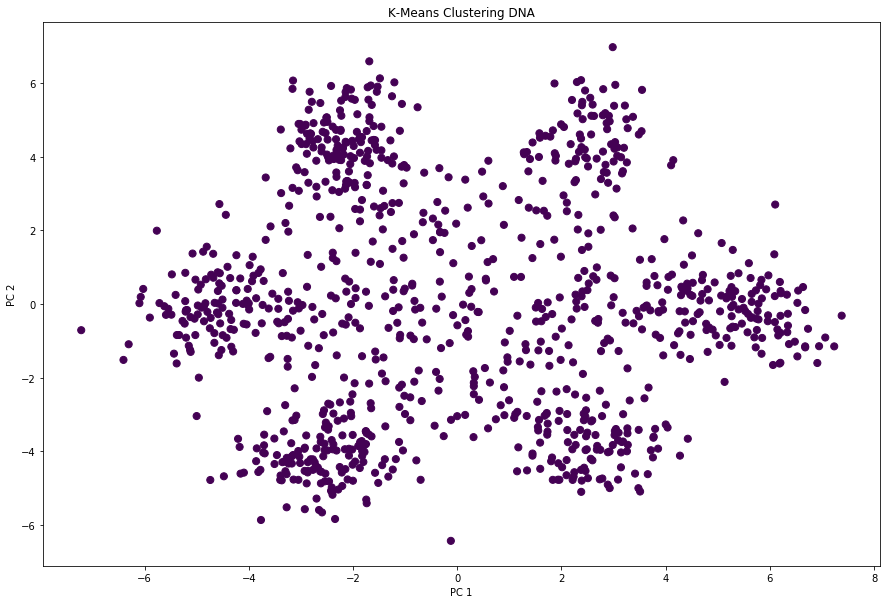

In [23]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(finalDf['PC 1'],finalDf['PC 2'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering DNA')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
# plt.colorbar(scatter)

### $\color{blue}{\text{Question: How many clusters do you see?}}$

Your answer here: 6 or 7

### <div style="text-align: justify">$\color{blue}{\text{Task:}}$ Run the k-means algorithm again, but with the number of clusters you see. Visualize your data.</div>

In [28]:
# Hint: KMeans is already imported and kmeans inserted. Also the function doKmeans is already defined.
clust_labels, cent = doKmeans(stdf_df, 7)
kmeans7 = pd.DataFrame(clust_labels)

Text(0, 0.5, 'PC 2')

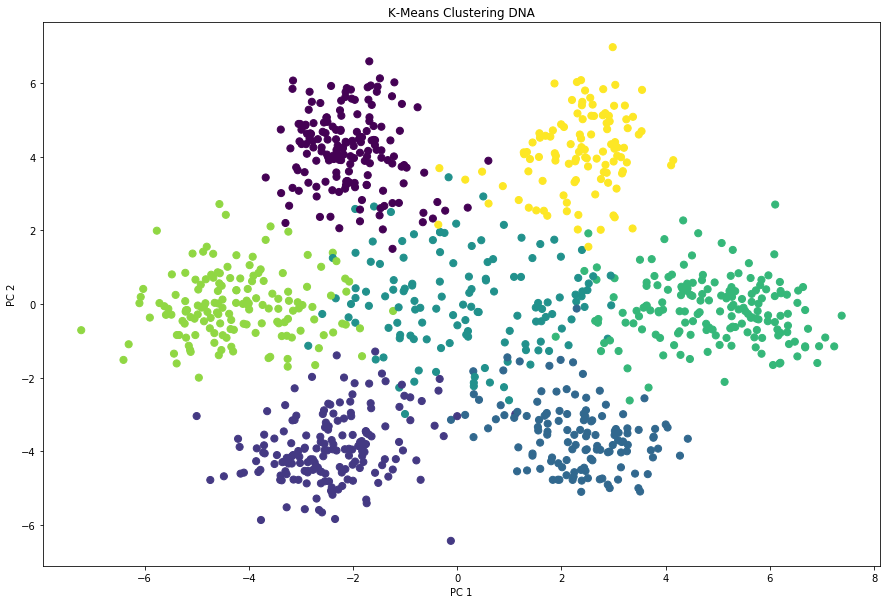

In [29]:
# Data visualization
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(finalDf['PC 1'],finalDf['PC 2'],
                     c=kmeans7[0],s=50)
ax.set_title('K-Means Clustering DNA')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

### $\color{blue}{\text{Interpretation.}}$

<div style="text-align: justify">This is a clustering of fragments of the sequence by similarity in their triplets distribution. This is a highly structured plot that shows the existence of a non-overlapping triplet code. Indeed, since we blindly separated the fragment into groups of words of length three, any group can contain either a part of a gene in the forward direction, a part of a gene in the backward direction, no part of a gene or a mixture. In the first two cases and the last one, a group can overlap with a gene in three possible ways; that is, with three possible shifts: the correct shift; if the first triplet of the group overlaps with a triplet of a gene, and two incorrect shifts; if the first letter of the first triplet overlaps with the second or third letter of a triplet of a gene. This gives six possible frequency distributions, corresponding to six clusters. The seventh frequency distribution; that is, the seventh cluster, arises from groups containing no parts of a gene.</div>       

### $\color{blue}{\text{Conclusions.}}$

Your conclusion here 

### $\color{blue}{\text{References.}}$<br>

<div style="text-align: justify">[1] Crick, F.H.C., Barnett, L., Brenner, S., and Watts-Tobin, R.J.: General nature of the genetic code for proteins. Nature, 192, 1227–1232 (1961).</div>
<div style="text-align: justify">[2] Gorban A.N., Zinovyev A.Y. (2008) PCA and K-Means Decipher Genome. In: Gorban A.N., Kégl B., Wunsch D.C., Zinovyev A.Y. (eds) Principal Manifolds for Data Visualization and Dimension Reduction. Lecture Notes in Computational Science and Enginee, vol 58. Springer, Berlin, Heidelberg.</div>